<a href="https://colab.research.google.com/github/ahmed-gharib89/TensorFlow_2_for_Deep_Learning/blob/master/week2/Building_a_Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(16, activation='relu', name='layer1'),
    Dense(16, activation='relu', name='layer2'),
    Dense(10, name='output'),
    Softmax()
])

In [5]:
# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 16)                12560     
_________________________________________________________________
layer2 (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [20]:
# Build the Sequential convolutional neural network model

model = Sequential([
                    Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1),
                           name='conv1'),
                    MaxPooling2D(3, name='pool1'),
                    Flatten(),
                    Dense(10, activation='softmax', name='dense1')
])

In [21]:
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 16)        160       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense1 (Dense)               (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [22]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc, mae]
)


In [23]:
# Print the resulting model attributes
print(f'Model Optimizer: {model.optimizer} and Learning Rate: {model.optimizer.lr}\nModel Loss: {model.loss}\nModel Metrics: {model.metrics}')


Model Optimizer: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f6aa2e4c320> and Learning Rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
Model Loss: sparse_categorical_crossentropy
Model Metrics: []


***
<a id="coding_tutorial_4"></a>
## The fit method

In [18]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [19]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
# Print the shape of the training data
print(f'Train Images Shape : {train_images.shape}\nTrain Labels Shape: {train_labels.shape}\nTest Images Shape: {test_images.shape}\nTest Labels Shape: {test_labels.shape}')


Train Images Shape : (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [25]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [26]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255
test_images = test_images / 255


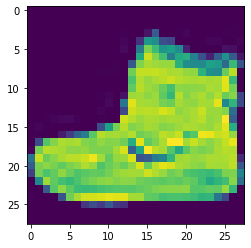

Label: Ankle boot


In [27]:
# Display one of the images
i = 0
img = train_images[0, :, :]
plt.imshow(img)
plt.show()
print(f'Label: {labels[train_labels[i]]}')


#### Fit the model

In [29]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)


Epoch 1/8
235/235 - 12s - loss: 0.3241 - sparse_categorical_accuracy: 0.8840 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 12s - loss: 0.3075 - sparse_categorical_accuracy: 0.8888 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 12s - loss: 0.2970 - sparse_categorical_accuracy: 0.8916 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 12s - loss: 0.2890 - sparse_categorical_accuracy: 0.8952 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 12s - loss: 0.2785 - sparse_categorical_accuracy: 0.8991 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 12s - loss: 0.2730 - sparse_categorical_accuracy: 0.9013 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 12s - loss: 0.2671 - sparse_categorical_accuracy: 0.9020 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 12s - loss: 0.2620 - sparse_categorical_accuracy: 0.9044 - mean_absolute_error: 4.4200


#### Plot training history

In [31]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.324141,0.884033,4.420000
1,0.307519,0.888833,4.420001
2,0.297033,0.891583,4.420001
3,0.289041,0.895167,4.420002
4,0.278475,0.899083,4.420000
5,0.273042,0.901317,4.419999
6,0.267054,0.901967,4.420001
7,0.261964,0.904450,4.420001


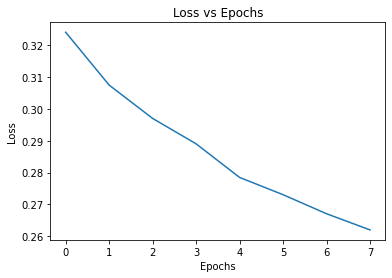

In [34]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss');


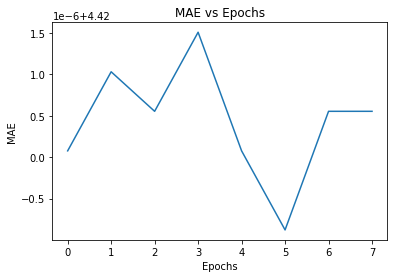

In [37]:
# Make a plot for the accuracy
MAE_plot = df.plot(y='mean_absolute_error', title='MAE vs Epochs', legend=False)
MAE_plot.set(xlabel='Epochs', ylabel='MAE');


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [38]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [39]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)


313/313 [==============================] - 2s 5ms/step - loss: 0.3092 - sparse_categorical_accuracy: 0.8900 - mean_absolute_error: 4.4200


#### Make predictions from the model

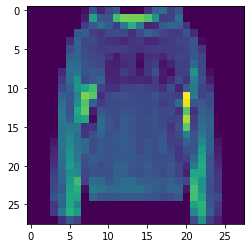

Label: Pullover


In [51]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [52]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,..., np.newaxis])
print(F'True Label: {labels[test_labels[random_inx]]}\nModel predictions: {labels[pred.argmax()]}')


True Label: Pullover
Model predictions: Pullover
